# Railway Track Fault Detection
---
|Subject:|Mathematical Modeling Practice|
|---|---|
|Semester:|Fall 2022|
|Name:|Tamás Demus|
|NEPTUN:|XP4B9D|
---

## Dataset
---
|Name:|Railway Track Fault Detection|
|---|---|
|Link to dataset:|https://www.kaggle.com/datasets/salmaneunus/railway-track-fault-detection|
---

Importing modules

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import cv2 as cv

# import tensorflow as tf

from tqdm.notebook import trange, tqdm
import os

Setting up environment

In [3]:
PATH = [
    './data/Train/Non defective/',
    './data/Train/Defective/',
    './data/Validation/Non defective/',
    './data/Validation/Defective/',
    './data/Test/Non defective/',
    './data/Test/Defective/',
]

PATH_tmp = '-/tmp/'

Creating image dataframe

In [4]:
images = pd.DataFrame(columns=[
    'type',
    'defect',
    'defect_str',
    'path',
    'filename',
    'img'
])

for each in PATH:
    p = each.split('/')
    t = p[2].lower()
    if p[3] == 'Defective':
        y = 1
    else:
        y = 0
    for img in os.listdir(each):
        d = {
            'type': t,
            'defect': y,
            'defect_str': p[3],
            'path': each,
            'filename': img,
            'img': os.path.join(each, img)
        }
        df = pd.DataFrame(data=d, index=[1])
        images = pd.concat([images, df])

images.reset_index(inplace=True, drop=True)
images

type defect     defect_str                         path  \
0    train      0  Non defective  ./data/Train/Non defective/   
1    train      0  Non defective  ./data/Train/Non defective/   
2    train      0  Non defective  ./data/Train/Non defective/   
3    train      0  Non defective  ./data/Train/Non defective/   
4    train      0  Non defective  ./data/Train/Non defective/   
..     ...    ...            ...                          ...   
379   test      1      Defective       ./data/Test/Defective/   
380   test      1      Defective       ./data/Test/Defective/   
381   test      1      Defective       ./data/Test/Defective/   
382   test      1      Defective       ./data/Test/Defective/   
383   test      1      Defective       ./data/Test/Defective/   

                    filename  \
0    IMG_20201114_103009.jpg   
1    IMG_20201114_100134.jpg   
2    IMG_20201114_101046.jpg   
3    IMG_20201114_102902.jpg   
4    IMG_20201114_103326.jpg   
..                       ...   
379  IMG_20201114_101200.jpg   
380  IMG_20201114_101124.jpg   
381  IMG_20201211_121713.jpg   
382  IMG_20201114_100159.jpg   
383  IMG_20201114_102203.jpg   

                                                   img  
0    ./data/Train/Non defective/IMG_20201114_103009...  
1    ./data/Train/Non defective/IMG_20201114_100134...  
2    ./data/Train/Non defective/IMG_20201114_101046...  
3    ./data/Train/Non defective/IMG_20201114_102902...  
4    ./data/Train/Non defective/IMG_20201114_103326...  
..                                                 ...  
379      ./data/Test/Defective/IMG_20201114_101200.jpg  
380      ./data/Test/Defective/IMG_20201114_101124.jpg  
381      ./data/Test/Defective/IMG_20201211_121713.jpg  
382      ./data/Test/Defective/IMG_20201114_100159.jpg  
383      ./data/Test/Defective/IMG_20201114_102203.jpg  

[384 rows x 6 columns]

Check the shape of the images

In [6]:
img_shape = []
for each in tqdm(images.img):
    image = cv.imread(each)
    img_shape.append(image.shape)

  0%|          | 0/384 [00:00<?, ?it/s]

Minimum  width  :  148  @  177
Maximum  width  :  8000  @  281
Minimum  height  :  156  @  275
Maximum  height  :  8000  @  157
Minimum  components  :  3  @  0
Maximum  components  :  3  @  0
Minimum  size  :  28712  @  177
Maximum  size  :  48000000  @  157


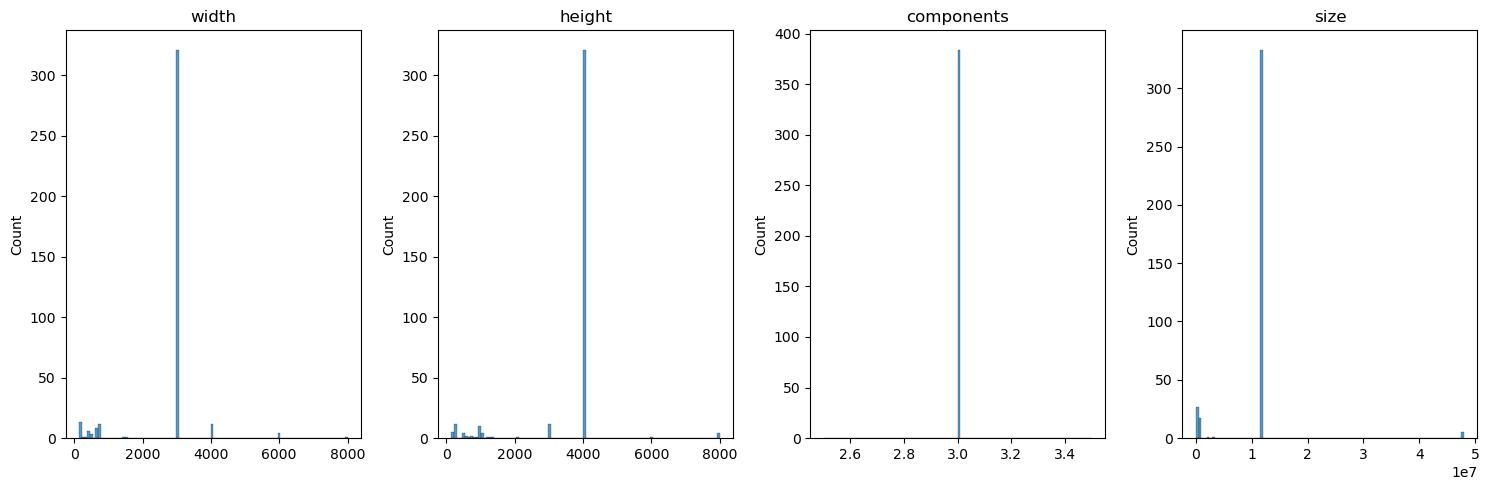

In [7]:
img_shape = np.array(img_shape)

fig, ax = plt.subplots(1, 4, figsize=(15, 5), tight_layout=True)

dims = ['width', 'height', 'components','size']
for i, dim in enumerate(dims):
    if i < 3:
        vector = img_shape[:, i]
    else:
        vector = img_shape[:, 0] * img_shape[:, 1]
    sns.histplot(vector, bins=100, ax=ax[i])
    ax[i].set_title(dim)
    print('Minimum ', dim, ' : ', min(vector), ' @ ', np.argmin(vector))
    print('Maximum ', dim, ' : ', max(vector), ' @ ', np.argmax(vector))



Check if dataset is balanced

In [21]:
images.groupby(['type', 'defect_str']).count()

defect  path  filename  img
type       defect_str                                
test       Defective          11    11        11   11
           Non defective      11    11        11   11
train      Defective         150   150       150  150
           Non defective     150   150       150  150
validation Defective          31    31        31   31
           Non defective      31    31        31   31

Generating random sample from training data

In [22]:
N_samples = 16
random_sample_idx = []
for i in range(N_samples):
    idx = np.random.choice(images[images.type == 'train'].index)
    random_sample_idx.append(idx)
random_sample = images.iloc[random_sample_idx].copy()
random_sample

type defect     defect_str                         path  \
54   train      0  Non defective  ./data/Train/Non defective/   
168  train      1      Defective      ./data/Train/Defective/   
165  train      1      Defective      ./data/Train/Defective/   
88   train      0  Non defective  ./data/Train/Non defective/   
194  train      1      Defective      ./data/Train/Defective/   
294  train      1      Defective      ./data/Train/Defective/   
13   train      0  Non defective  ./data/Train/Non defective/   
131  train      0  Non defective  ./data/Train/Non defective/   
6    train      0  Non defective  ./data/Train/Non defective/   
100  train      0  Non defective  ./data/Train/Non defective/   
294  train      1      Defective      ./data/Train/Defective/   
213  train      1      Defective      ./data/Train/Defective/   
87   train      0  Non defective  ./data/Train/Non defective/   
134  train      0  Non defective  ./data/Train/Non defective/   
19   train      0  Non defective  ./data/Train/Non defective/   
260  train      1      Defective      ./data/Train/Defective/   

                                              filename  \
54                             IMG_20201114_100032.jpg   
168                  damagetotrackfromcollisionlfb.jpg   
165                            IMG_20201114_102939.jpg   
88                             IMG_20201114_102836.jpg   
194                            IMG_20201211_112904.jpg   
294                                        unnamed.jpg   
13                             IMG_20201114_102714.jpg   
131                            IMG_20201114_102558.jpg   
6                              IMG_20201114_102429.jpg   
100                            IMG_20201114_100114.jpg   
294                                        unnamed.jpg   
213  131004959_171473721383413_8222187747086021011_...   
87                             IMG_20201114_101500.jpg   
134                            IMG_20201114_102542.jpg   
19                             IMG_20201114_100412.jpg   
260                                        6411009.jpg   

                                                   img  
54   ./data/Train/Non defective/IMG_20201114_100032...  
168  ./data/Train/Defective/damagetotrackfromcollis...  
165     ./data/Train/Defective/IMG_20201114_102939.jpg  
88   ./data/Train/Non defective/IMG_20201114_102836...  
194     ./data/Train/Defective/IMG_20201211_112904.jpg  
294                 ./data/Train/Defective/unnamed.jpg  
13   ./data/Train/Non defective/IMG_20201114_102714...  
131  ./data/Train/Non defective/IMG_20201114_102558...  
6    ./data/Train/Non defective/IMG_20201114_102429...  
100  ./data/Train/Non defective/IMG_20201114_100114...  
294                 ./data/Train/Defective/unnamed.jpg  
213  ./data/Train/Defective/131004959_1714737213834...  
87   ./data/Train/Non defective/IMG_20201114_101500...  
134  ./data/Train/Non defective/IMG_20201114_102542...  
19   ./data/Train/Non defective/IMG_20201114_100412...  
260                 ./data/Train/Defective/6411009.jpg

Visualizing random sample

  0%|          | 0/16 [00:00<?, ?it/s]

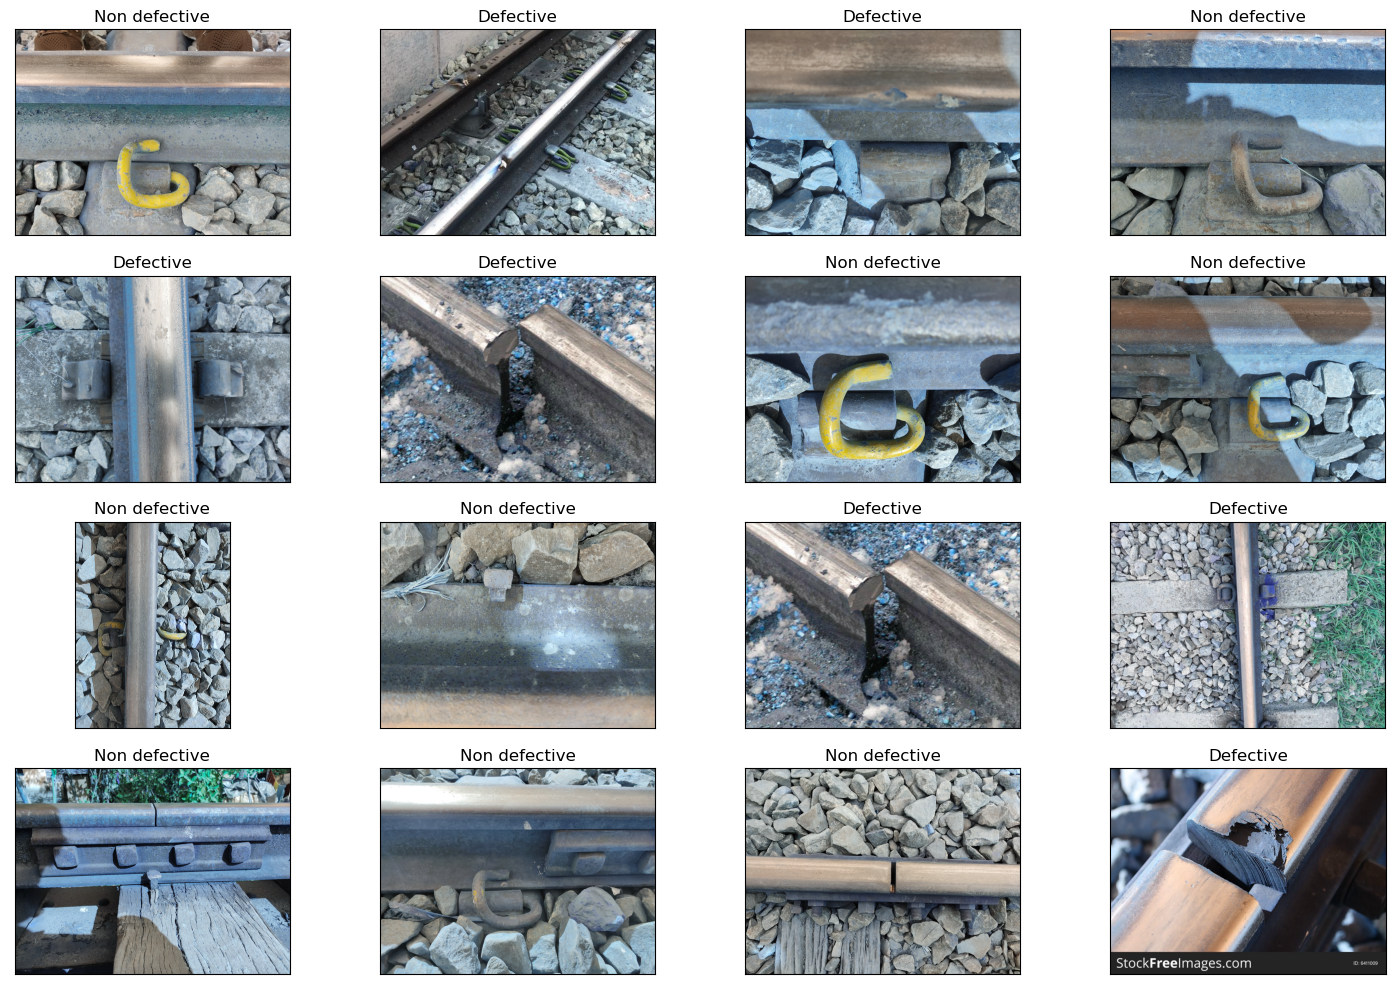

In [23]:
dim = np.ceil(np.sqrt(N_samples)).astype(int)
fig, ax = plt.subplots(dim, dim, figsize=(15, 10), tight_layout=True)
ax = ax.flatten()

for i, idx in enumerate(tqdm(random_sample.index)):
    image = cv.imread(images.img[idx])
    ax[i].imshow(image)
    ax[i].set_xticks(ticks=[])
    ax[i].set_yticks(ticks=[])
    ax[i].set_title(images.defect_str[idx])

plt.show()


Checking basic information on random sample: color components on RGB and HSV

In [24]:
gs = gridspec.GridSpec(3, 4)

for each in tqdm(
    (
        random_sample[['img', 'defect_str']].to_numpy()
    ).tolist()
):
    fig = plt.figure(figsize=(15, 5), tight_layout=True)
    fig.suptitle(each[1])
    ax = [
        fig.add_subplot(gs[:, 0]),
        fig.add_subplot(gs[0, 1]),
        fig.add_subplot(gs[1, 1]),
        fig.add_subplot(gs[2, 1]),
        fig.add_subplot(gs[:, 2]),
        fig.add_subplot(gs[0, 3]),
        fig.add_subplot(gs[1, 3]),
        fig.add_subplot(gs[2, 3]),
    ]
    image = cv.imread(each[0])
    ax[0].imshow(image)
    ax[0].set_title('Original')
    
    for c, component in enumerate(['red', 'green', 'blue']):
        sns.histplot(image[:, :, c].ravel(), bins=256, color=component, ax=ax[c+1])
        ax[c+1].set_ylabel = component
        
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    ax[4].imshow(hsv)
    ax[4].set_title('HSV')
    
    for c, component in enumerate(['hue', 'saturation', 'value']):
        bins = [180, 256, 256]
        sns.histplot(hsv[:, :, c].ravel(), bins=bins[c], ax=ax[c+5])
        ax[c+5].set_ylabel = component

  0%|          | 0/16 [00:00<?, ?it/s]

We can consider a rail non-defective when it is not broken and there is proper mounting to the sleepers.

Idea: this might be detected via the continuity of the edges: on the top it should be continuous, at the bottom it should be periodically intersected by the mounting elements.

  0%|          | 0/16 [00:00<?, ?it/s]

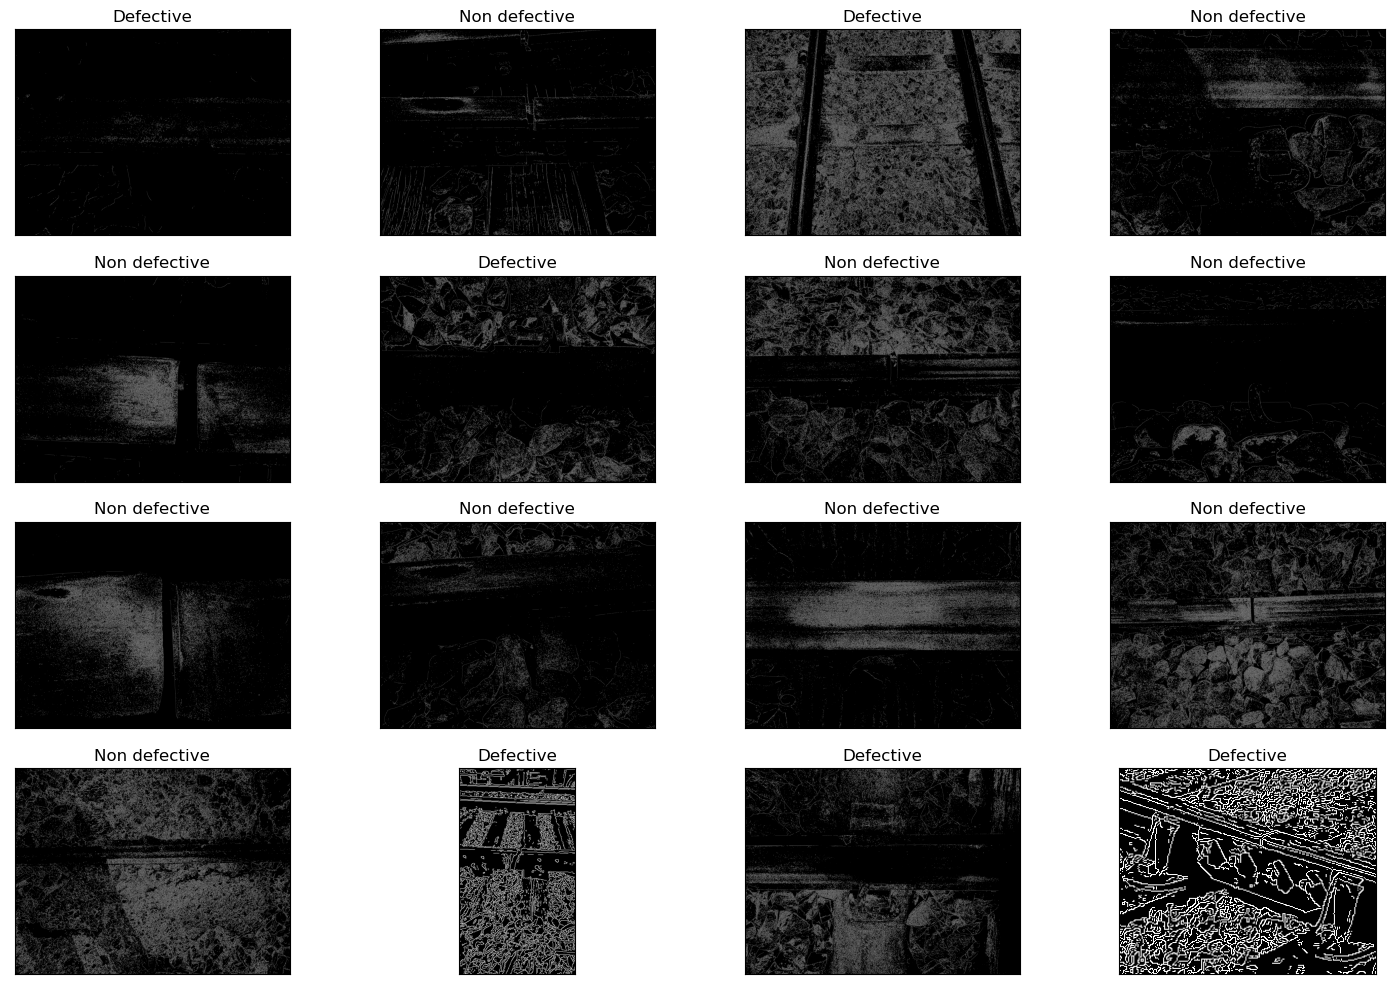

In [22]:
fig, ax = plt.subplots(dim, dim, figsize=(15, 10), tight_layout=True)
ax = ax.flatten()

for i, idx in enumerate(tqdm(random_sample.index)):
    image = cv.imread(images.img[idx])
    edges = cv.Canny(image, 150, 200)
    ax[i].imshow(edges, cmap='gray')
    ax[i].set_xticks(ticks=[])
    ax[i].set_yticks(ticks=[])
    ax[i].set_title(images.defect_str[idx])

plt.show()

Experimenting with image processing pipeline

  0%|          | 0/16 [00:00<?, ?it/s]

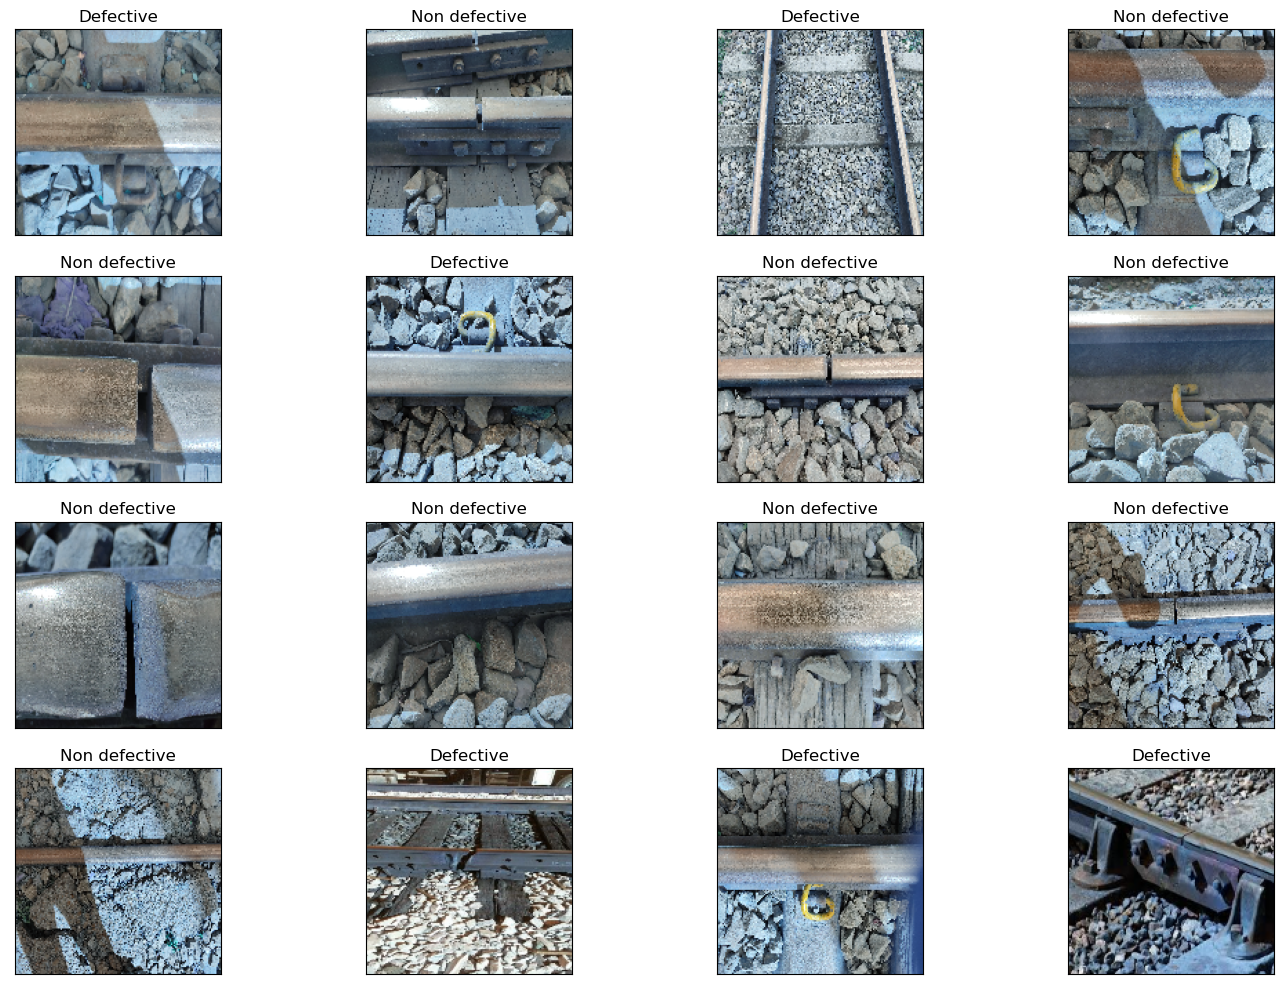

In [26]:
fig, ax = plt.subplots(dim, dim, figsize=(15, 10), tight_layout=True)
ax = ax.flatten()

for i, idx in enumerate(tqdm(random_sample.index)):
    image = cv.imread(images.img[idx])
    resized = cv.resize(image, (150, 150))
    ax[i].imshow(resized)
    ax[i].set_xticks(ticks=[])
    ax[i].set_yticks(ticks=[])
    ax[i].set_title(images.defect_str[idx])

Setting up neural network